<a href="https://colab.research.google.com/github/yashsinghal11/Data-Science_-Theory-Coding_tutorial-/blob/main/Linearregression_tutorial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("Boston.csv")

In [ ]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.describe()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

print("After Removing Outliers:", df.shape)


After Removing Outliers: (214, 15)


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("medv", axis=1)
y = df_encoded["medv"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from math import sqrt
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=sqrt(mse)
print("mean_absolute_error",mae)
print("mean_squared_error",mse)
print("R2_score",r2_score)
print("root_mean_square_error",rmse)

mean_absolute_error 1.3697006307661537
mean_squared_error 3.384193241072713
R2_score <function r2_score at 0x7ceac789aac0>
root_mean_square_error 1.83961768883448


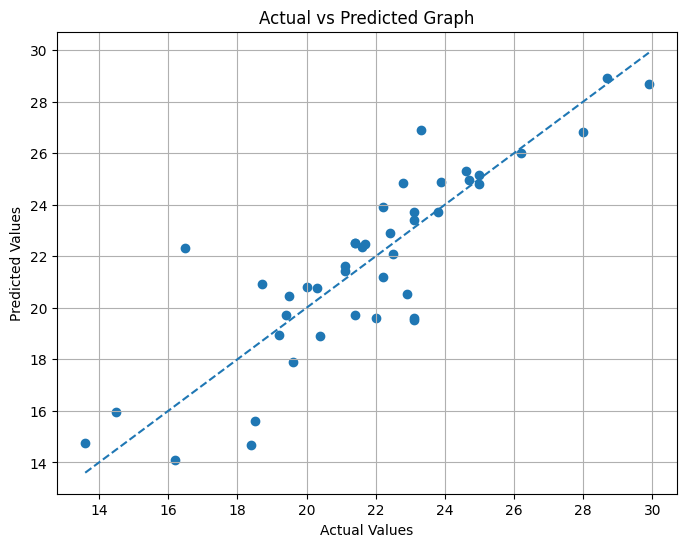

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

# Scatter plot
plt.scatter(y_test, y_pred)

# Line of perfect prediction
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Graph")
plt.grid(True)
plt.show()

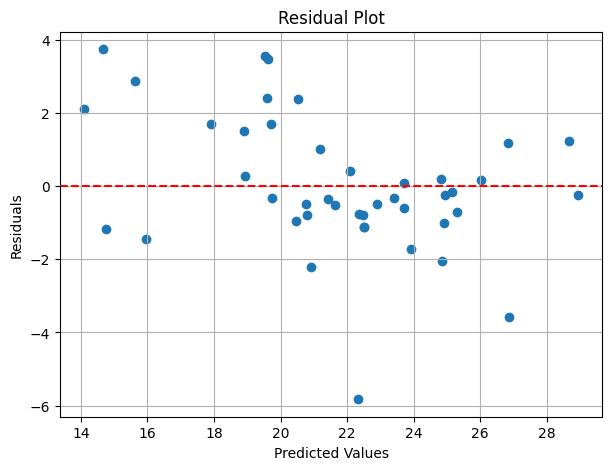

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

In [ ]:
print("Accuracy %:", r2 * 100)

Accuracy %: 69.18485177530638
